<a href="https://colab.research.google.com/github/Ananya-Kannan/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fitz  # PyMuPDF

def convert_pdf_to_images(pdf_path, output_folder):
    doc = fitz.open(pdf_path)
    for page_number in range(doc.page_count):
        page = doc.load_page(page_number)
        image = page.get_pixmap()
        image_path = f"{output_folder}/page_{page_number + 1}.png"
        image.save(image_path)
    doc.close()


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00


In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display

In [ ]:
FILE_NAME = 'image.jpeg'

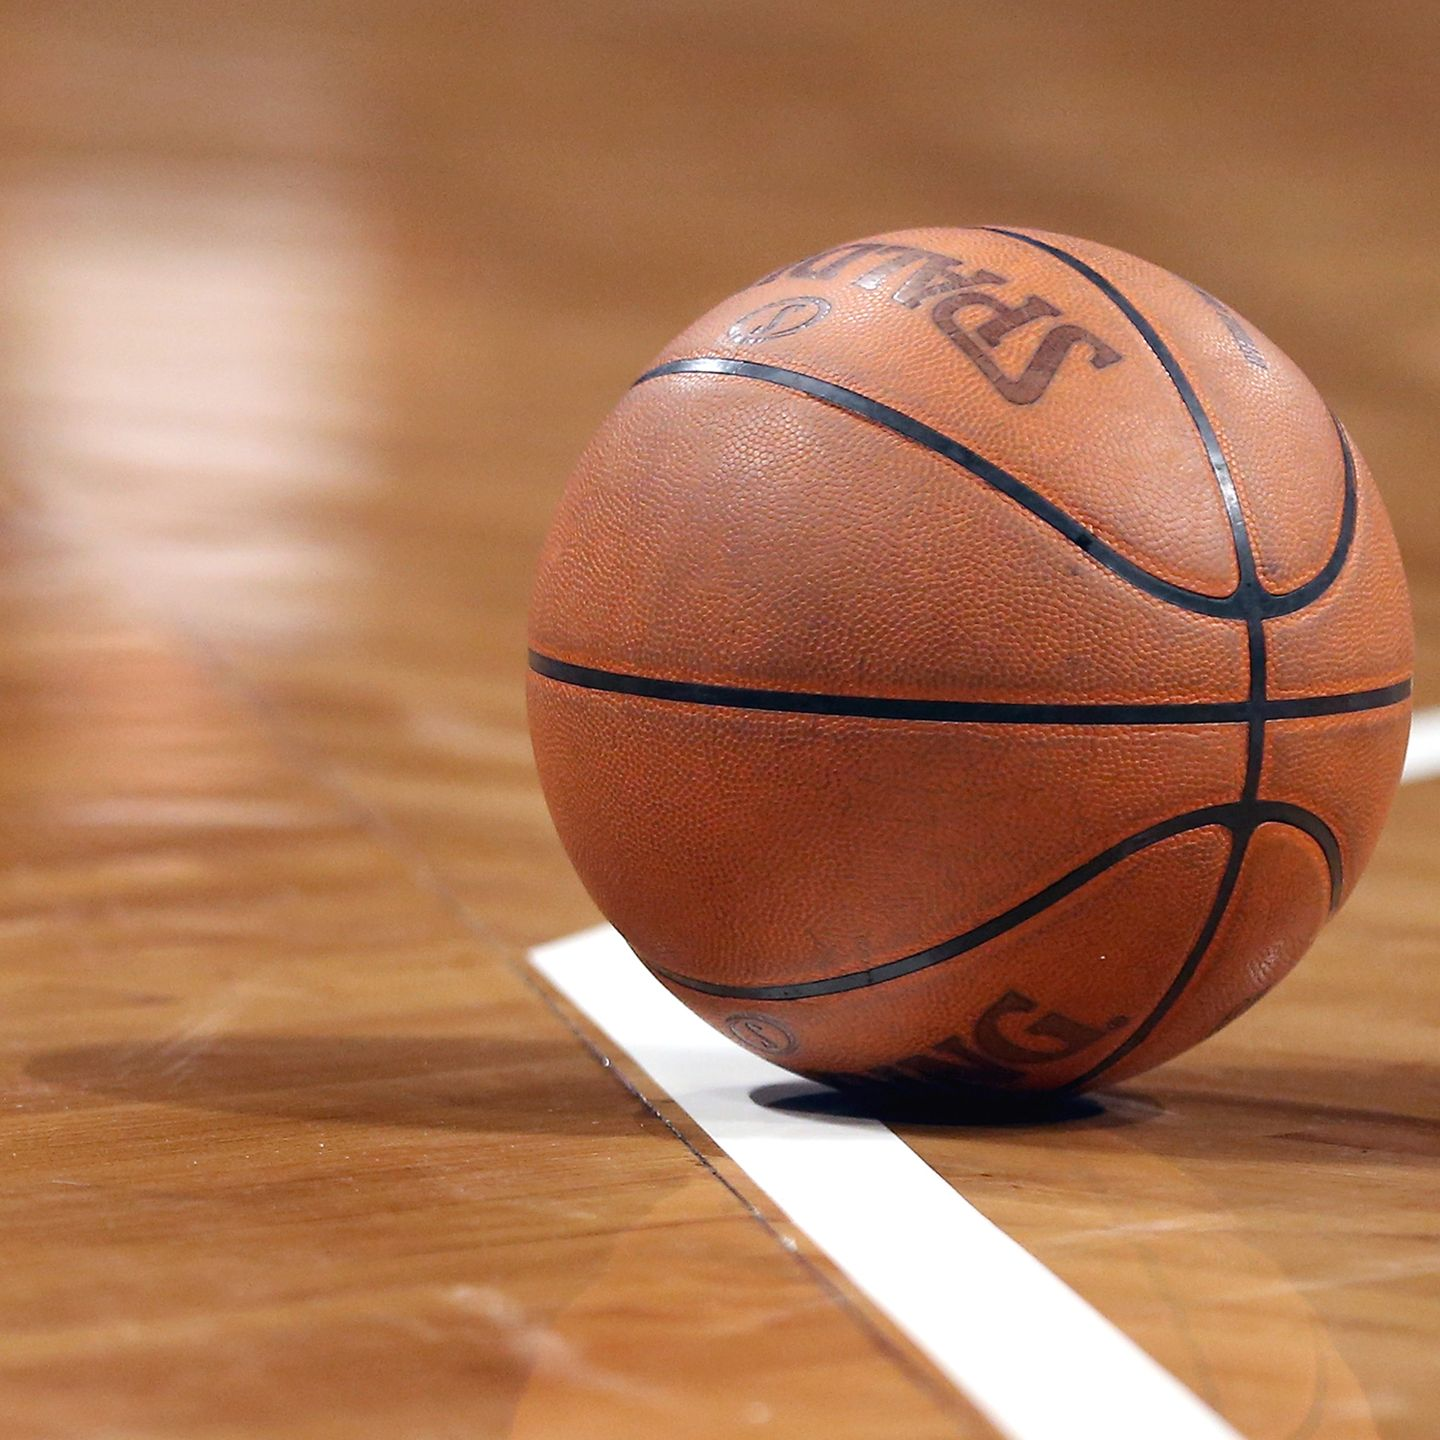

In [ ]:
display(Image(FILE_NAME, width = 400, height = 400))


In [ ]:
image_array = img.open('image.jpeg')

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


**Extract Features**

In [ ]:
inputs = feature_extractor(images = image_array, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

**Make Predictions**

In [ ]:
predicted_class_idx = logits.argmax(-1).item()

In [ ]:
print(predicted_class_idx)

430


In [ ]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: basketball
